## GIXOS using flight path on Soller position

Settings at 2024-02-28
14.4 keV
to be entered

TODO:
define functions to wrap up the data processing

In [1]:
#c.logout()

# running env    <conda activate pxrr>
import os
print(os.environ.get('CONDA_DEFAULT_ENV'))
#must be run in the pxrr environment
#ONE MIGHT HAVE TO REFRESH THE KERNEL

/home/xf12id1/conda_envs/pxrr


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import os
import time
from databroker import Broker
import pyFAI.calibrant as calib
from pyFAI.multi_geometry import MultiGeometry
from pyFAI.gui import jupyter
from PIL import Image
from gixos_dependencyA import *
#must ASK FOR USER NAME OR ITS AN ERROR AND ONE HAS TO REFRESH THE KERNEL

  File "/home/xf12id1/conda_envs/pxrr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/xf12id1/conda_envs/pxrr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 211, in start
    self.asyncio_loop.run_forever()
  File "/home/xf12id1/conda_envs/pxrr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    self._run_once()
  File "/home/xf12id1/conda_envs/pxrr/lib

In [ ]:
# metadata.yaml smart auto-update
import yaml
from pxrr.data_io import metadata_update
yaml.preserve_quotes = True

# ---------------- File paths ----------------
path_xrr = '/nsls2/xf12id1/users/2025-3/319544_Ocko2/XRR_analysis/data2/'
xrr_datafile = 'R-51268-PFOA_0p2mM_chit_2gL_pH6_run2-c06a494e.txt'
path = '/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/'
path_out = '/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/processed/'

# ---------------- Experimental setup ----------------
gamma_E = 0.5772156649015329
Qc = 0.0217
energy = 14400
alpha_i = 0.0728
Ddet = 633
Ddet = 680  # override
pixel = 0.172
footprint = 10
sdd = 1039.9
slit_h = 1
slit_v = 0.66
RqxyHW = 0.0002
DSresHW = 0.003
DSpxHW = 3.5

# ---------------- Sample selection ----------------
sample = 'instrument'
scan = [51218, 51220, 51224, 51226, 51228, 51230]
bkgsample = 'instrument'
bkgscan = [51219, 51221, 51225, 51227, 51229, 51231]
qxy0 = [0.04, 0.06, 0.10, 0.15, 0.2, 0.318]
qxy0_select_idx = 0
qxy_bkg = 0.3
I0ratio_sample2bkg = 2.0

# ---------------- Physical / derived / dependency ----------------
kb = 1.381e-23
tension = 36/1000
temperature = 293
kappa = 15
amin = 6
qz_selected = [0.1, 0.3, 0.35, 0.4, 0.6]
kappa_deviation = 3
rho_b = 9.42E-6

# Output file
output_file = '/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/processed/metadata_test.yaml'

# Direct smart update (no manual metadata dict)
metadata = metadata_update(output_file, locals(), write_yaml=True)

In [54]:
%matplotlib inline
from pseudo_xrr.Dependency import *
from pseudo_xrr.data_io import *

0.040000	0.060000	0.100000	0.150000	0.200000	0.318000	

/home/xf12id1/pseudo_xrr/pseudo_xrr/gixos.py:111: RuntimeWarning: divide by zero encountered in divide
  C_integrand[idx, :] = 2 * pi * r_grid**(1 - eta_val) * (np.exp(-eta_val * besselk(0, r_grid / Lk)) - 1)
/home/xf12id1/pseudo_xrr/pseudo_xrr/gixos.py:114: RuntimeWarning: divide by zero encountered in scalar divide
  RRF_term = ((xi / kbT_gamma) * Rqxy_HWHM**eta + Rqxy_HWHM**2 * C / (4 * pi)) * (1 / qmax)**eta * np.exp(eta * besselk(0, 1 / (Lk * qmax)))
/home/xf12id1/pseudo_xrr/pseudo_xrr/gixos.py:17: RuntimeWarning: divide by zero encountered in divide
  term2 = np.exp(-eta[..., None] * besselk(0, rad_term / Lk)) - 1
/home/xf12id1/pseudo_xrr/pseudo_xrr/gixos.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  exp_term = np.exp(eta * besselk(0, 1 / (Lk * qmax)))
/home/xf12id1/pseudo_xrr/pseudo_xrr/gixos.py:111: RuntimeWarning: divide by zero encountered in divide
  C_integrand[idx, :] = 2 * pi * r_grid**(1 - eta_val) * (np.exp(-eta_val * besselk(0, r_grid / Lk)) - 1)

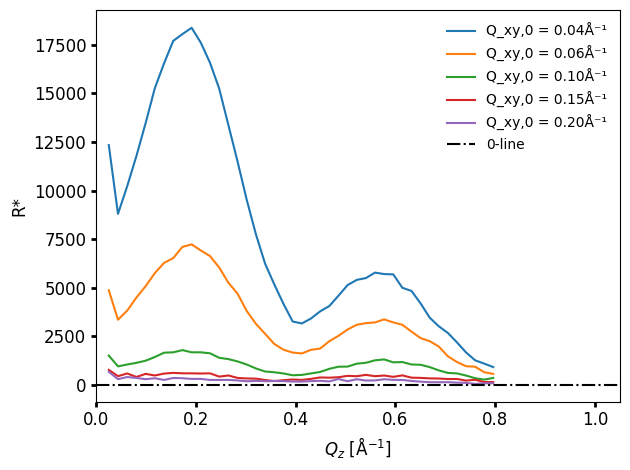

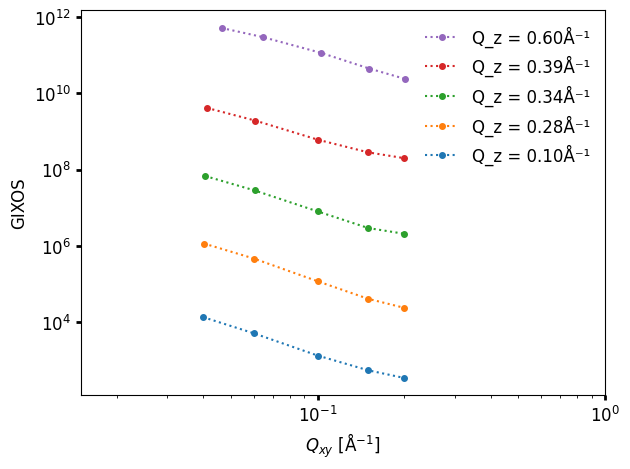

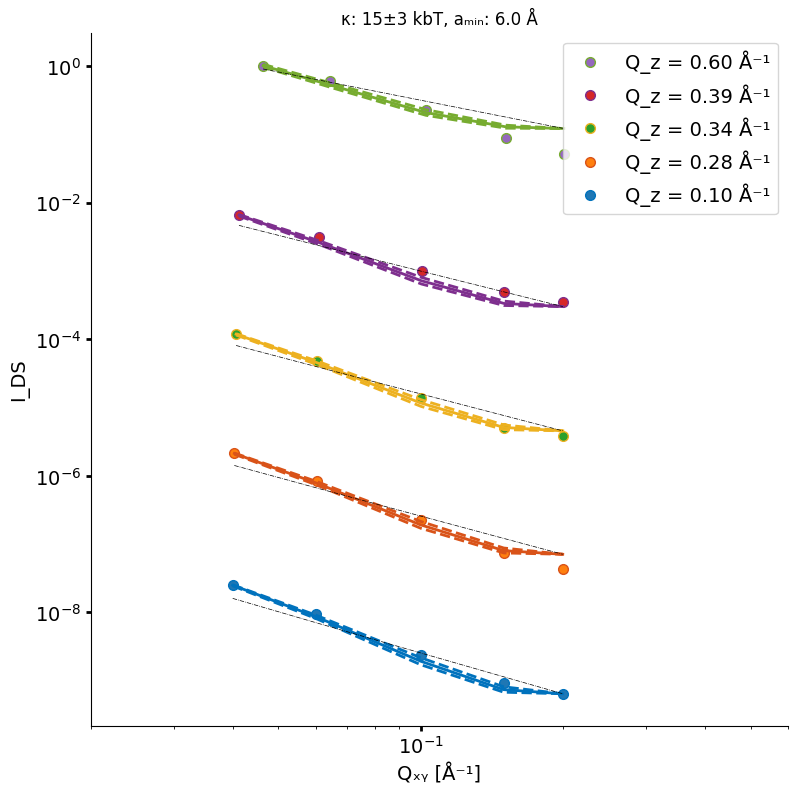

In [55]:
dependency_wrapper('/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/processed/metadata_test.yaml')

0.040000	0.060000	0.100000	0.150000	0.200000	0.318000	

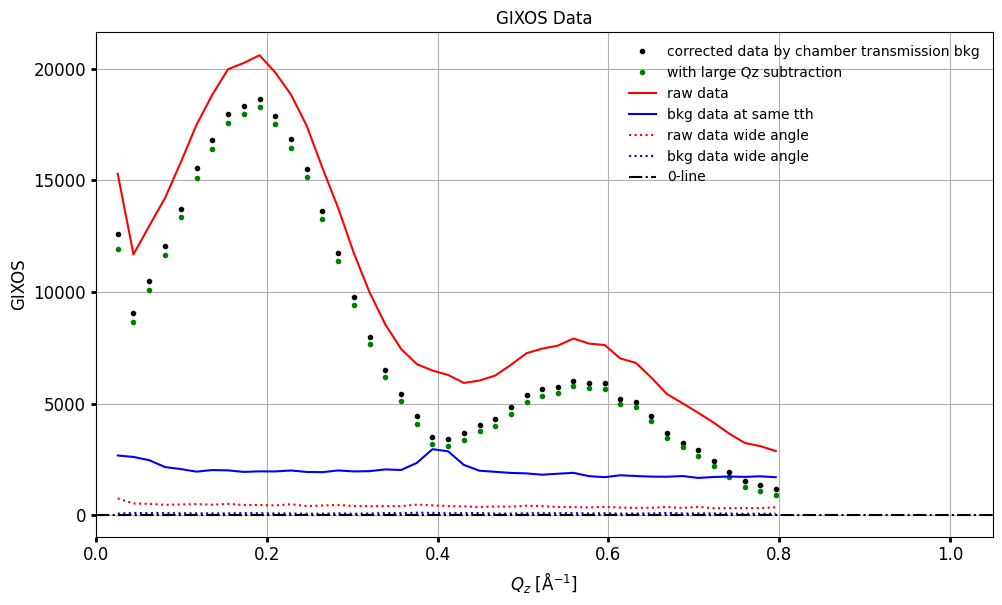

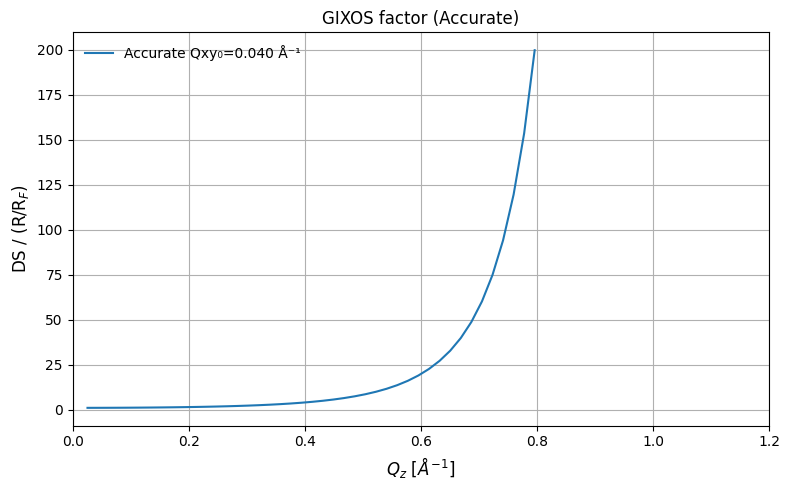

xrr_config keys: dict_keys(['energy', 'sdd', 'slit_h', 'slit_v', 'wavelength', 'wave_number', 'Qz', 'dataQz', 'beta_xrr', 'dataRF', 'RF', 'kbT_gamma', 'eta', 'delta_phi_HW', 'delta_beta_HW', 'slit_h_coord', 'slit_v_coord', 'slit_t', 'slit_b', 'slit_l', 'slit_r', 'slit_coord', 'qxy_slit', 'qxy_slit_min', 'ang', 'qxy_slit_min_coord', 'phi_max_qxy_slit_min', 'phi_array_for_qxy_slit_min', 'delta_beta_array_for_qxy_slit_min', 'bkgoff', 'bkg_phi', 'r_step', 'r', 'C_integrand', 'C', 'qxy_slit_min_flat', 'RRF_term', 'specular_qxy_min', 'region_around_radial_u_r', 'region_around_radial_l_r', 'diff_r', 'diff_r_bkgoff', 'Rterm_rect_slit', 'bkgterm_rect_slit'])


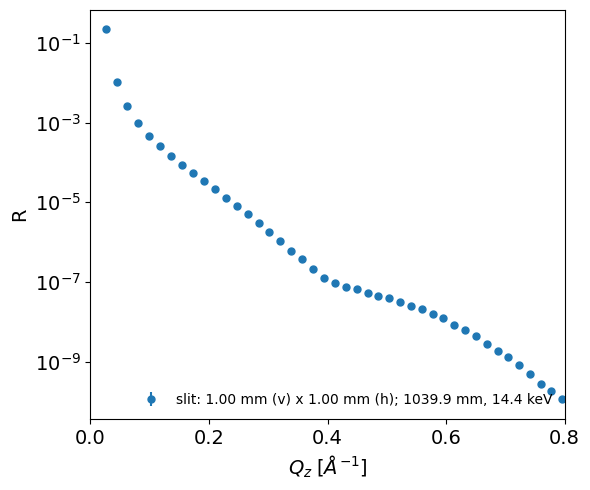

/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


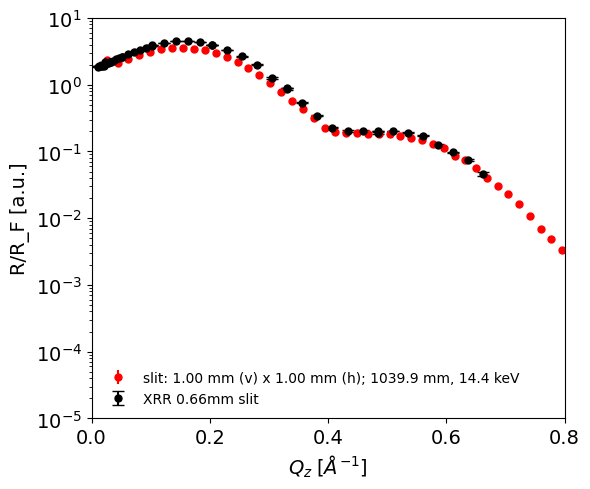

In [56]:
rectangular_slit('/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/processed/metadata_test.yaml')

In [ ]:
# Step by step processing. Equivalent to above cell

0.040000	0.060000	0.100000	0.150000	0.200000	0.318000	at A
at B
at C
at D
at E
at F


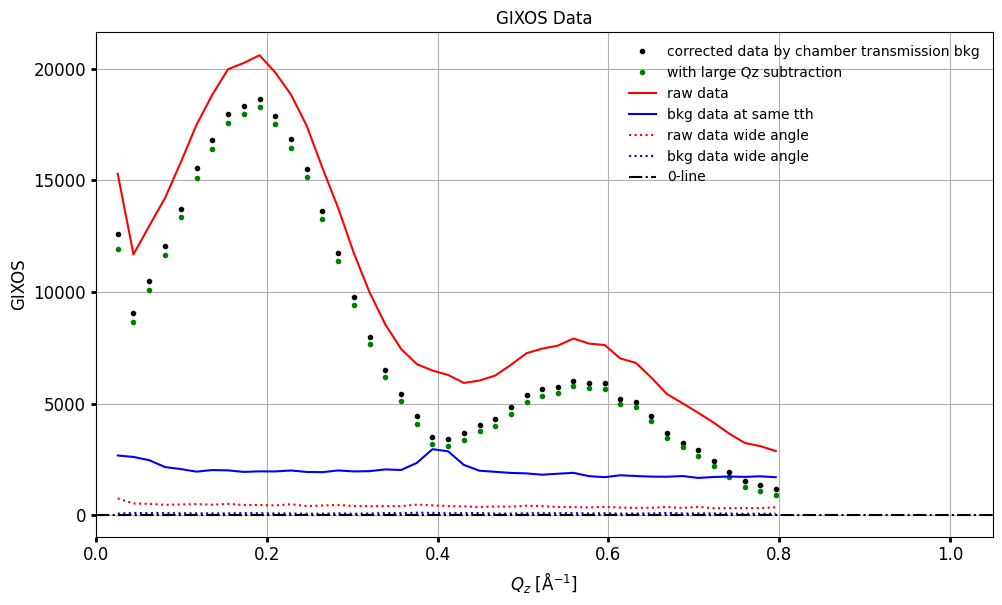

at G


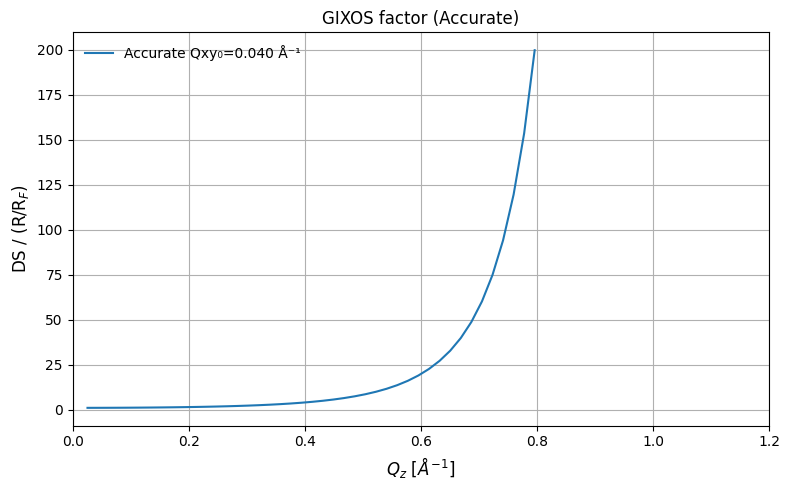

at H
at I
{'energy': 14400, 'sdd': 1039.9, 'slit_h': 1, 'slit_v': 1, 'wavelength': 0.8611111111111112, 'wave_number': 7.296602292208552, 'Qz': array([0.02556322, 0.04401315, 0.06246248, 0.08091091, 0.09935809,
       0.11780363, 0.13624715, 0.15468839, 0.17312692, 0.19156241,
       0.20999452, 0.22842289, 0.24684715, 0.26526693, 0.28368197,
       0.30209181, 0.32049615, 0.33889467, 0.35728695, 0.37567272,
       0.39405161, 0.41242319, 0.43078723, 0.44914331, 0.46749114,
       0.48583031, 0.50416051, 0.52248141, 0.54079265, 0.55909389,
       0.57738482, 0.59566507, 0.61393427, 0.63219217, 0.65043834,
       0.6686725 , 0.68689436, 0.70510345, 0.72329956, 0.74148232,
       0.75965142, 0.77780648, 0.79594724]), 'dataQz': array([0.01018629, 0.01273361, 0.01528093, 0.01782825, 0.02037556,
       0.02292288, 0.0254702 , 0.02801751, 0.03056482, 0.03311214,
       0.03056482, 0.03565945, 0.04075407, 0.04584869, 0.0509433 ,
       0.0509433 , 0.0611325 , 0.07132167, 0.08151081, 0.09169991

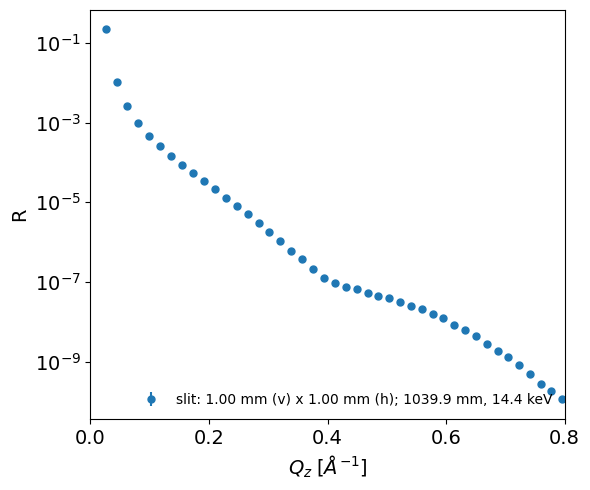

at M


/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


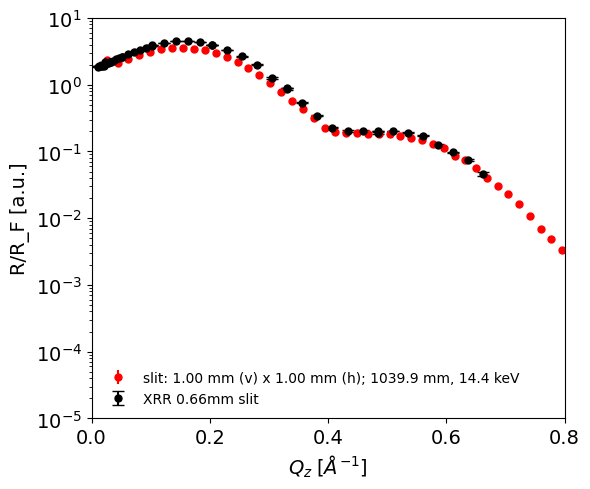

at N


In [57]:
from pseudo_xrr.data_io import load_data, load_metadata, binning_GIXOS_data, remove_negative_2theta, real_space_2theta, GIXOS_data_plot_prep, GIXOS_RF_and_SF, rect_slit_function, conversion_to_reflectivity, GIXOS_file_output
from pseudo_xrr.plots import GIXOS_data_plot, R_data_plot, R_pseudo_data_plot
metadata_file = '/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/processed/metadata_test.yaml'
importGIXOSdata, importbkg = load_data(metadata_file)
print("at A")
metadata = load_metadata(metadata_file)
print("at B")
importGIXOSdata, importbkg = binning_GIXOS_data(importGIXOSdata, importbkg)
print("at C")
importGIXOSdata, importbkg, tt_step = remove_negative_2theta(importGIXOSdata, importbkg)
print("at D")
metadata = real_space_2theta(metadata)
print("at E")
GIXOS, DSbetaHW = GIXOS_data_plot_prep(importGIXOSdata, importbkg, metadata, tt_step)
print("at F")
GIXOS_data_plot(GIXOS, metadata)
print("at G")
GIXOS = GIXOS_RF_and_SF(GIXOS, metadata, DSbetaHW)
print("at H")
xrr_config = rect_slit_function(GIXOS, metadata)
print("at I")
print(xrr_config)
print("at J")
GIXOS = conversion_to_reflectivity(GIXOS, xrr_config)
print("at K")
print("xrr_config keys:", xrr_config.keys())
print("at L")
GIXOS_file_output(GIXOS, xrr_config, metadata, tt_step)
print("at K")
R_data_plot(GIXOS, metadata, xrr_config)
print("at M")
R_pseudo_data_plot(GIXOS, metadata, xrr_config)
print("at N")


In [58]:
# Check the results from GIXOS
print(GIXOS.keys())
print(GIXOS['refl_recSlit'])

dict_keys(['tt', 'GIXOS_raw', 'GIXOS_bkg', 'Qxy', 'Qz', 'raw_largetth', 'bkg_largetth', 'GIXOS', 'error', 'fresnel', 'Qz_array', 'transmission', 'dQz', 'DS_RRF_integ', 'DS_term_integ', 'RRF_term_integ', 'refl', 'SF', 'refl_recSlit', 'refl_roughness_term', 'refl_roughness'])
[[2.55632205e-02 1.02841617e+01 1.15522685e-01 2.39685228e-04]
 [4.40131457e-02 4.65319358e-01 6.43897566e-03 5.11055939e-04]
 [6.24624795e-02 1.16798784e-01 1.43977242e-03 7.82398319e-04]
 [8.09109128e-02 4.46725170e-02 4.89729828e-04 1.05369740e-03]
 [9.93580857e-02 2.12067856e-02 2.12569790e-04 1.32493748e-03]
 [1.17803626e-01 1.15234770e-02 1.06304980e-04 1.59610267e-03]
 [1.36247148e-01 6.61755611e-03 5.82466291e-05 1.86717690e-03]
 [1.54688394e-01 4.01708858e-03 3.39686018e-05 2.13814599e-03]
 [1.73126916e-01 2.46336674e-03 2.04561958e-05 2.40899298e-03]
 [1.91562406e-01 1.56682782e-03 1.28888688e-05 2.67970297e-03]
 [2.09994515e-01 9.70105050e-04 8.18242698e-06 2.95026051e-03]
 [2.28422886e-01 6.03828382e-04 

In [ ]:
def R_pseudo_data_plot(GIXOS, metadata, xrr_config, scale_factor):
    metadata["RFscaling"] = scale_factor
    GIXOS["refl_recSlit"] = np.array(GIXOS["refl_recSlit"])
    GIXOS["fresnel"] = np.array(GIXOS["fresnel"])
    xrr_data_data = np.array(metadata["xrr_data"])
    plt.close("RRF")
    fig, ax = plt.subplots(num="RRF", figsize=(6, 5))
    fig.canvas.manager.set_window_title("RRF")
    ax.errorbar(
        GIXOS["refl_recSlit"][:, 0],
        GIXOS["refl_recSlit"][:, 1] / GIXOS["fresnel"][:, 1] / metadata["RFscaling"],
        yerr=GIXOS["refl_recSlit"][:, 2] / GIXOS["fresnel"][:, 1] / metadata["RFscaling"],
        fmt="ro", markersize=5, linewidth=1.5,
        label=(f"slit: {xrr_config['slit_v']:.2f} mm (v) x {xrr_config['slit_h']:.2f} mm (h); {xrr_config['sdd']:.1f} mm, {xrr_config['energy']/1000:.1f} keV")
    )
    ax.errorbar(
        xrr_data_data[:, 0],
        xrr_data_data[:, 1] / xrr_config["dataRF"],
        yerr=xrr_data_data[:, 2] / xrr_config["dataRF"],
        fmt="ko", markersize=5, linewidth=1.5, capsize=4, label="XRR 17. mm slit"
    )
    ax.set_xlim(0, 0.8)
    ax.set_ylim(1e-5, 10)
    ax.set_xlabel(r"$Q_z \\ [\\AA^{-1}]$", fontsize=14)
    ax.set_ylabel("R/R_F [a.u.]", fontsize=14)
    ax.tick_params(axis="both", which="major", labelsize=14, direction="out")
    ax.set_xticks(np.arange(0, 0.81, 0.2))
    ax.set_yscale("log")
    ax.legend(loc="lower left", frameon=False)
    plt.tight_layout()
    filename = f"{metadata['path_out']}{metadata['sample']}_{metadata['scan'][ metadata['qxy0_select_idx'] ]:05d}_RRF_PYTHON.jpg"
    plt.savefig(filename, dpi=300)
    plt.show()

/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/xf12id1/conda_envs/pxrr/lib/python3.10/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


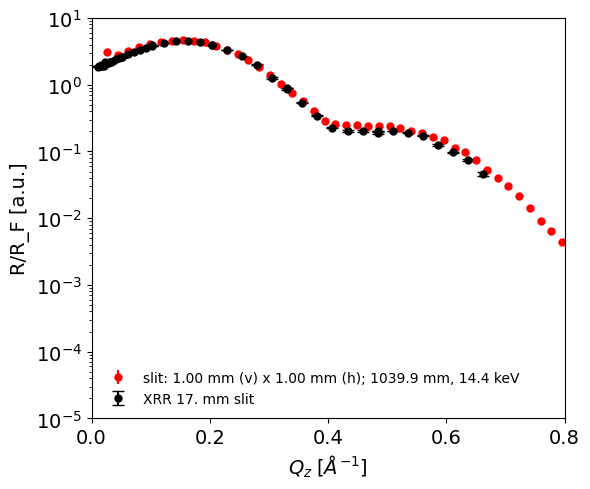

In [62]:
R_pseudo_data_plot(GIXOS, metadata, xrr_config, scale_factor=35)

In [ ]:
# p100kA # 2025-09-30 APW
sdd = 633/1000
pxsize = 172e-6
bad_pixel = (100, 269)
roi_y = 195-111
roi_x = 41
roi_dy = 4
solidangle_ref = pxsize*(roi_dy*2+1)*pxsize*1/sdd**2
sample_id_set = np.arange(48718, 48731+1)